In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud, STOPWORDS
from collections import Counter


jeopardy_data = pd.read_csv('jeopardy_questions.tsv', sep='\t')

In [27]:
jeopardy_data.describe()

,round,clue_value,daily_double_value
count,468317.000000,468317.000000,468317.000000
mean,1.523278,710.751265,98.984530
std,0.532603,507.587035,572.448656
min,1.000000,0.000000,0.000000
25%,1.000000,400.000000,0.000000
50%,2.000000,600.000000,0.000000
75%,2.000000,1000.000000,0.000000
max,3.000000,2000.000000,25000.000000


In [17]:
random_rows = jeopardy_data.sample(n=10)
random_rows

,round,clue_value,daily_double_value,category,comments,answer,question,air_date,notes
115594,2,400,0,THE 1970s,NaN,"On Christmas Day 1974, a cyclone damaged 90% o...",Australia,1997-01-09,NaN
392527,2,1600,0,"LOVE SONGS, NOTHING BUT '80s LOVE SONGS",(Alex: You have to name the artist who recorde...,"\""This tainted love you given, I give you all ...",Soft Cell,2017-11-16,2017 Tournament of Champions final game 1.
320166,2,1600,1200,DISCOVERING JAPAN,NaN,"Though he didn't make it all the way to ""Cipan...",Marco Polo,2012-05-31,NaN
119619,1,400,0,BY GEORGE,NaN,Name shared by a 1926 Pulitzer Prize-winning p...,George Kelly,1997-04-18,NaN
222311,1,800,0,DRINKS,NaN,"The song ""Drops Of Jupiter"" by Train mentions ...",a soy latte,2005-02-24,"2005 Ultimate Tournament of Champions Round 1,..."
291863,1,600,0,E GODS!,NaN,Ekanetra & Ekarudra were both Vidyesvara gods ...,Hinduism,2010-04-23,NaN
96716,2,1000,0,THE ROARING '20s,NaN,His well-publicized 1925 trial was really betw...,(John) Scopes,1995-07-14,NaN
259689,2,1600,0,SPORTS SIBLING SURNAMES,NaN,NBA: Harvey & Horace,Grant,2007-12-20,NaN
105578,1,200,0,TV & MOVIE TOURISM,NaN,Hossburgers are served at the Ponderosa Ranch ...,"\""Bonanza\""",1996-03-21,NaN
58988,1,100,0,DOUBLE TALK,NaN,"Perhaps from a nickname for Louise, it's a sla...",lulu,1990-11-14,1990 Tournament of Champions semifinal game 3.


In [18]:
# Convert the 'air_date' column to a datetime data type
jeopardy_data['air_date'] = pd.to_datetime(jeopardy_data['air_date'])

# Verify the data type conversion
jeopardy_data.dtypes

round                          int64
clue_value                     int64
daily_double_value             int64
category                      object
comments                      object
answer                        object
question                      object
air_date              datetime64[ns]
notes                         object
dtype: object

In [19]:
# Get unique values in the 'category' column and their counts
category_counts = jeopardy_data['category'].value_counts()

# Display the top 20 categories by count
category_counts.head(20)


SCIENCE                1381
AMERICAN HISTORY       1216
LITERATURE             1180
HISTORY                1167
POTPOURRI              1110
SPORTS                 1095
WORD ORIGINS           1003
WORLD GEOGRAPHY         972
BUSINESS & INDUSTRY     964
RELIGION                938
WORLD HISTORY           934
TRANSPORTATION          894
ANIMALS                 848
ART                     834
U.S. CITIES             807
BOOKS & AUTHORS         778
BODIES OF WATER         775
GEOGRAPHY               759
BEFORE & AFTER          759
U.S. HISTORY            746
Name: category, dtype: int64

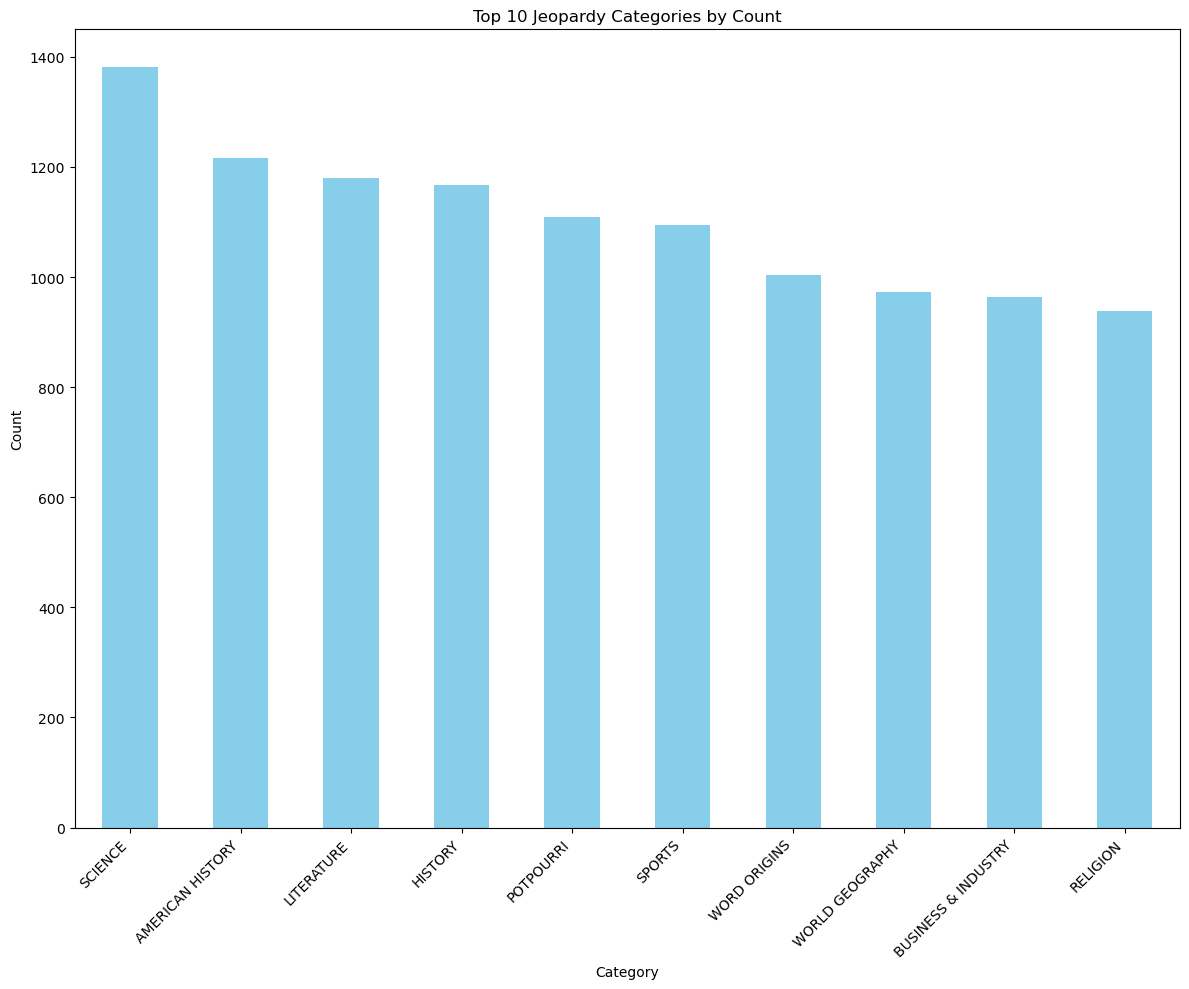

In [25]:
# Plotting the top 10 categories 
plt.figure(figsize=(12, 10))
category_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Jeopardy Categories by Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
# Get the latest date in the dataset
latest_date = jeopardy_data['air_date'].max()

# Calculate the date 10 years prior to the latest date
ten_years_ago = latest_date - pd.DateOffset(years=10)

# Filter the dataset for the last 10 years
last_10_years_data = jeopardy_data[jeopardy_data['air_date'] > ten_years_ago]

# Get the top 10 categories in the last 10 years
top_10_categories_last_10_years = last_10_years_data['category'].value_counts().head(10)

top_10_categories_last_10_years

AMERICAN HISTORY    289
SCIENCE             237
HISTORY             212
POTPOURRI           197
WORD ORIGINS        170
NONFICTION          157
HODGEPODGE          154
BEFORE & AFTER      145
AROUND THE WORLD    136
LITERATURE          136
Name: category, dtype: int64

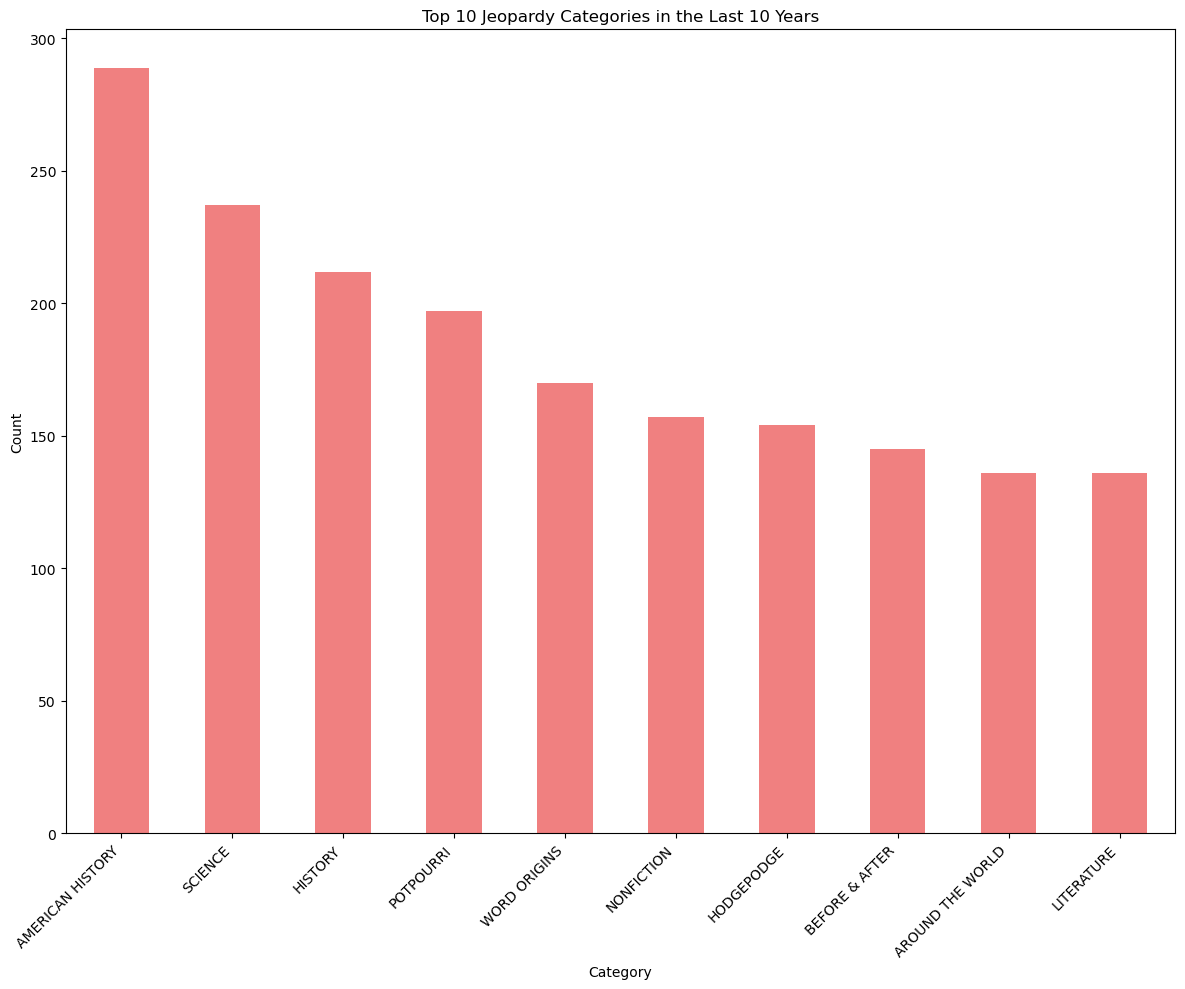

In [26]:
# Plotting the top 10 categories for the last 10 years
plt.figure(figsize=(12, 10))
top_10_categories_last_10_years.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Jeopardy Categories in the Last 10 Years')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

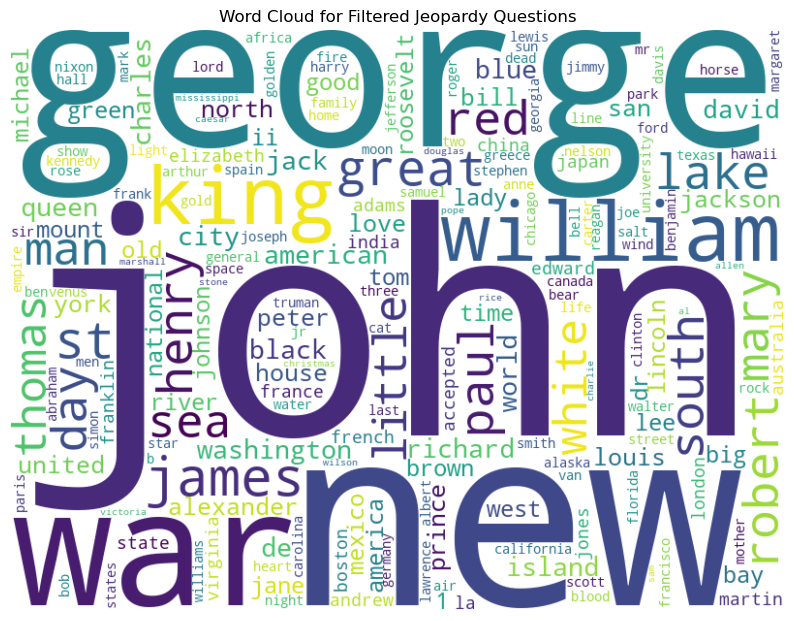

In [38]:
# Sample a subset of the data for word cloud generation
sampled_text = ' '.join(jeopardy_data['question'].sample(frac=0.1, random_state=42))

# Tokenize the text, convert to lowercase, and remove punctuation
tokens = [word.lower().translate(str.maketrans('', '', string.punctuation)) for word in sampled_text.split()]

# Define common stopwords and additional stopwords
stopwords = set(STOPWORDS)
additional_stopwords_list = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", 
    "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 
    'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 
    'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 
    'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 
    'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once','one','name','first','named',
    'called','2','title','known'
]
stopwords = stopwords.union(additional_stopwords_list)

# Filter out stopwords from the tokenized words
filtered_tokens = [word for word in tokens if word not in stopwords]

# Count word frequencies using Counter
word_frequencies = Counter(filtered_tokens)

# Generate word cloud using these frequencies
wordcloud_filtered = WordCloud(background_color="white", max_words=200, width=800, height=600).generate_from_frequencies(word_frequencies)

# Display word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_filtered, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud for Filtered Jeopardy Questions")
plt.show()


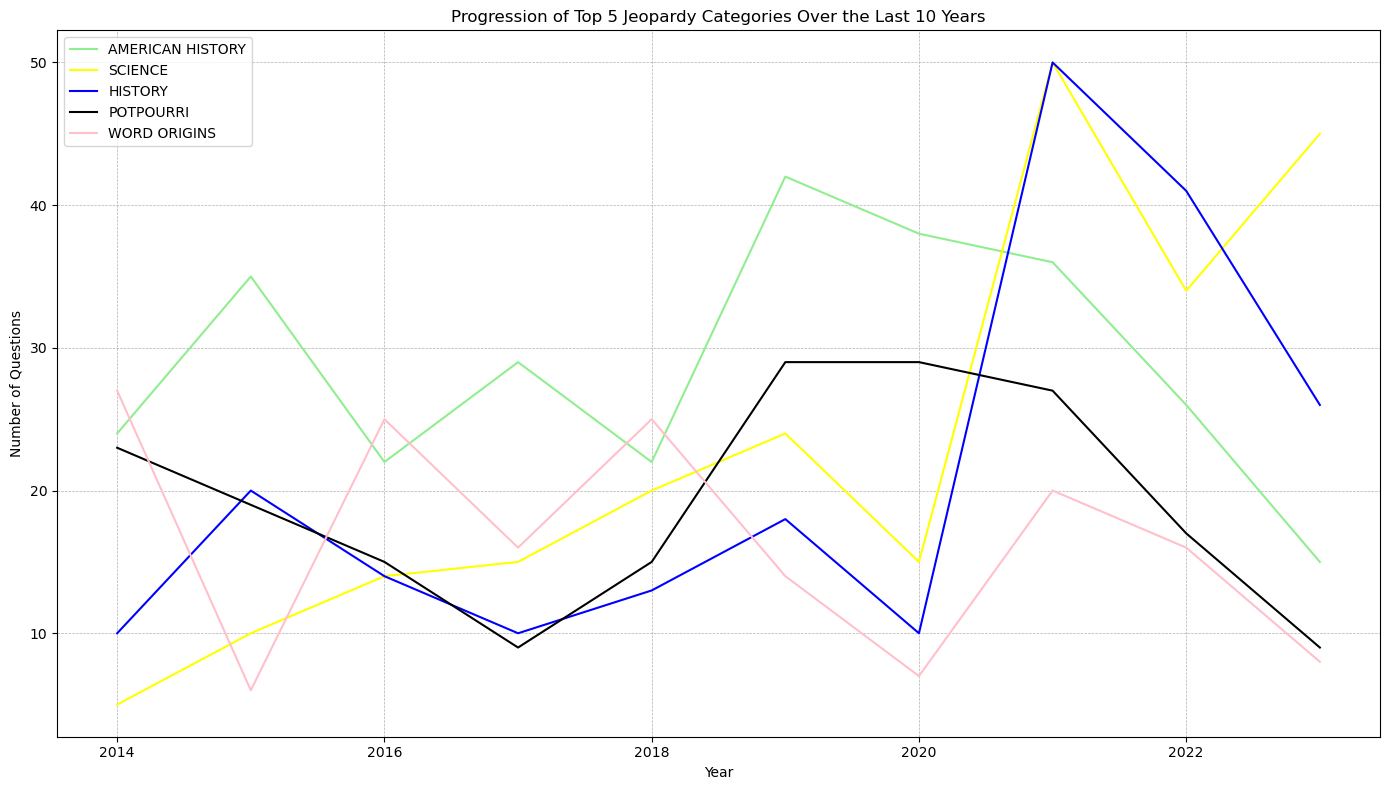

In [39]:
# Convert the 'air_date' column to datetime type
jeopardy_data['air_date'] = pd.to_datetime(jeopardy_data['air_date'])

# Extract year from the air_date column
jeopardy_data['year'] = jeopardy_data['air_date'].dt.year

# Filter the dataset for the last 10 years
recent_10_years_data = jeopardy_data[jeopardy_data['year'] > jeopardy_data['year'].max() - 10]

# Identify the top 5 categories for the last 10 years
top_5_categories_recent = recent_10_years_data['category'].value_counts().head(5).index.tolist()

# Filter the dataset for only the top 5 categories of the last 10 years
filtered_data_top_5_recent = recent_10_years_data[recent_10_years_data['category'].isin(top_5_categories_recent)]

# Group by year and category and count the occurrences
category_counts_over_time_recent = filtered_data_top_5_recent.groupby(['year', 'category']).size().unstack().fillna(0)

# Define colors as specified: light green, yellow, blue, black, and pink
colors = ['lightgreen', 'yellow', 'blue', 'black', 'pink']

# Plot the progression of each category over the last 10 years using the specified colors
plt.figure(figsize=(14, 8))
for idx, category in enumerate(top_5_categories_recent):
    plt.plot(category_counts_over_time_recent.index, category_counts_over_time_recent[category], label=category, color=colors[idx])

plt.title('Progression of Top 5 Jeopardy Categories Over the Last 10 Years')
plt.xlabel('Year')
plt.ylabel('Number of Questions')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
